In [92]:
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

from pathlib import Path

In [96]:
mse_list = []
mae_list = []
representation_name_list = []
for path in Path("/media/DATA/serbulent/Code/Thesis/ReviewPaper/generalized_representation_benchmark/results/")\
.glob("Affinit_prediction_skempiv1_*_detail.csv"):
    #print(path)
    representation_name_list.append(str(path).split("skempiv1_")[1].split("_detail.csv")[0])
    mse_list.append(pd.read_csv(path)['val_mse_errors'])
    mae_list.append(pd.read_csv(path)['val_mae_errors'])
    
df_mse = pd.concat(mse_list, axis=1)
df_mse.columns = representation_name_list
#Sorting columns by their mean value
df_mse = df_mse.reindex(df_mse.mean().sort_values().index, axis=1)

df_mae = pd.concat(mae_list, axis=1)
df_mae.columns = representation_name_list
#Sorting columns by their mean value
df_mae = df_mae.reindex(df_mae.mean().sort_values().index, axis=1)

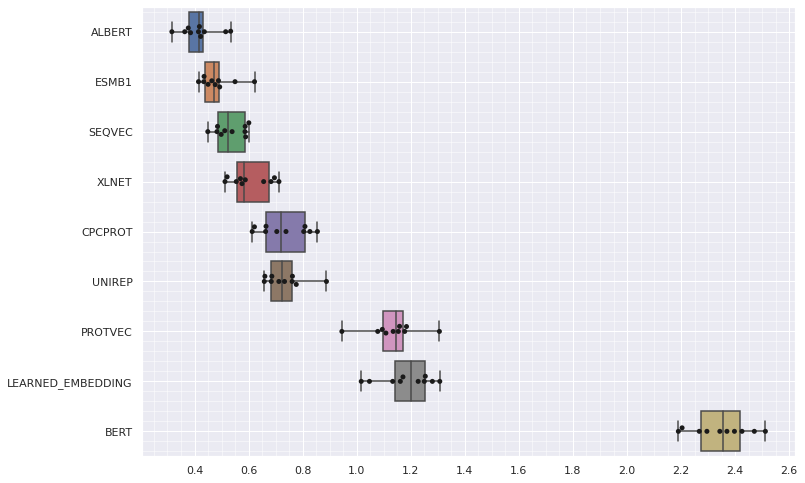

In [97]:
sns.set_theme(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.boxplot(data=df, whis=np.inf,  orient="h")
ax = sns.swarmplot(data=df, orient="h",color=".1")
#ax.set_xticks(np.arange(0,df.max().max(),0.1), minor=True)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

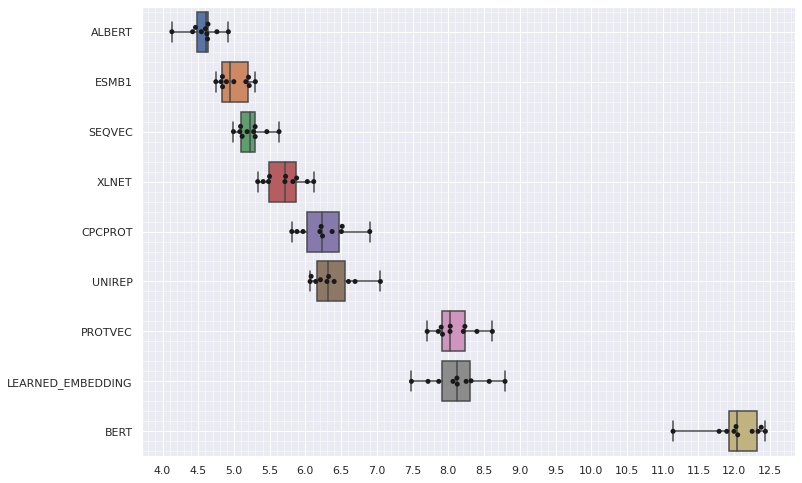

In [102]:
sns.set_theme(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.boxplot(data=df_mae, whis=np.inf,  orient="h")
ax = sns.swarmplot(data=df_mae, orient="h",color=".1")
#ax.set_xticks(np.arange(0,df.max().max(),0.1), minor=True)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)